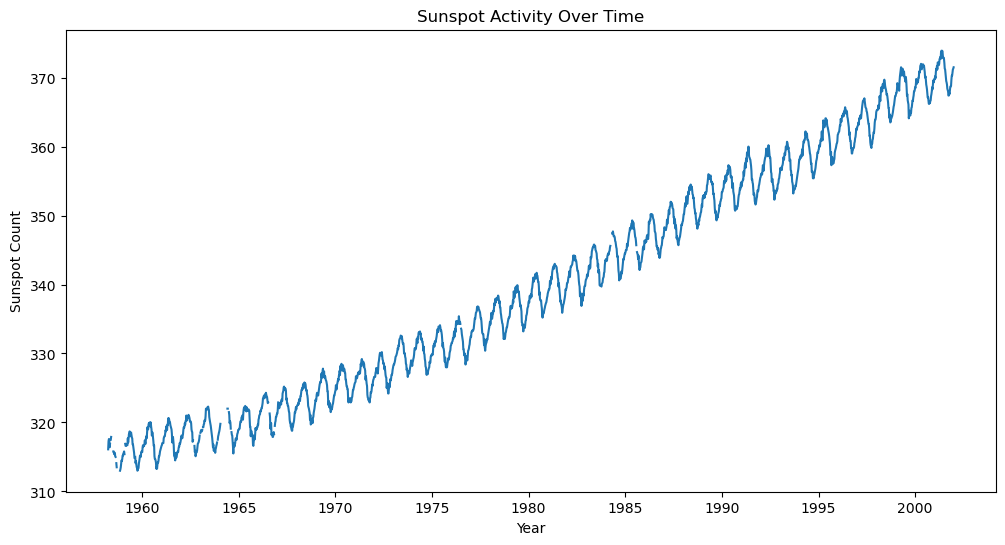

C:\Users\C Kishan Koushik\anaconda 3\lib\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\C Kishan Koushik\anaconda 3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


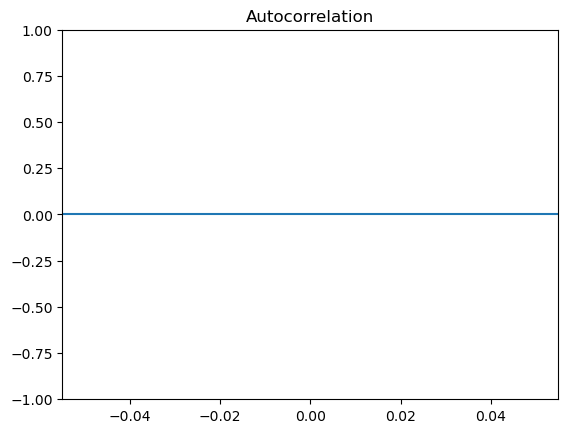

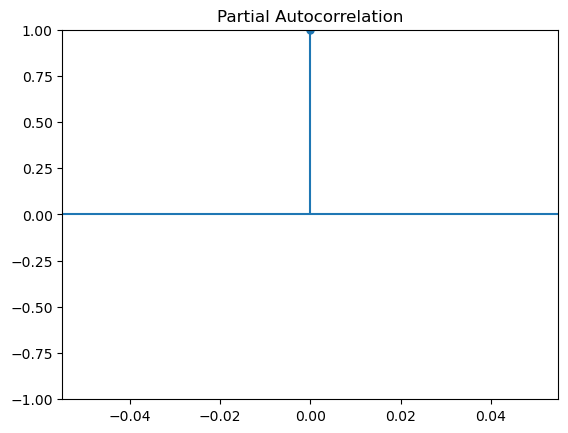

C:\Users\C Kishan Koushik\anaconda 3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\C Kishan Koushik\anaconda 3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\C Kishan Koushik\anaconda 3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\C Kishan Koushik\anaconda 3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA p

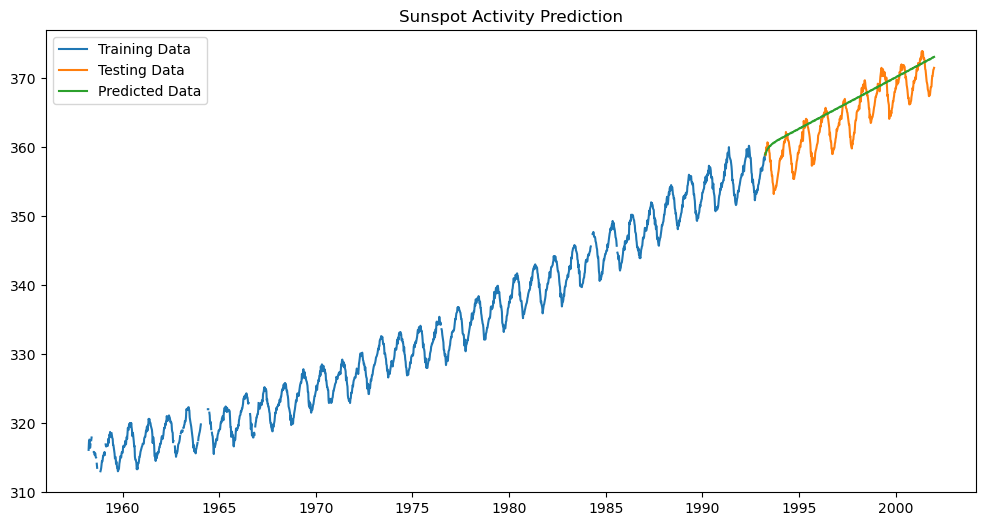

MAE: 2.494216247771159
MSE: 9.978534406671981
RMSE: 3.158881828538697


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.datasets import co2
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Load the sunspot data provided by statsmodels
data = co2.load_pandas().data
data.index = pd.date_range(start='1958-03-29', periods=len(data), freq='W-SAT')
sunspot_data = data['co2']

# Step 3: Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(sunspot_data)
plt.title("Sunspot Activity Over Time")
plt.xlabel("Year")
plt.ylabel("Sunspot Count")
plt.show()

# Step 4: Model identification
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(sunspot_data, lags=40)
plot_pacf(sunspot_data, lags=40)
plt.show()

# Step 5: Build the SARIMA model
p, d, q = 1, 1, 1  # Replace with appropriate values
P, D, Q, S = 1, 1, 1, 12  # Replace with appropriate values

model = SARIMAX(sunspot_data, order=(p, d, q), seasonal_order=(P, D, Q, S))
results = model.fit()

# Step 6: Model Evaluation
# Split the data
train_size = int(len(sunspot_data) * 0.8)
train, test = sunspot_data[:train_size], sunspot_data[train_size:]

# Fit the model
model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, S))
results = model.fit()

# Make predictions
start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start=start, end=end, dynamic=False)

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data')
plt.plot(predictions, label='Predicted Data')
plt.title("Sunspot Activity Prediction")
plt.legend()
plt.show()

# Step 7: Model Evaluation
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")